# Future Power Consumption Prediction for Canada and USA

## Data Exploration

***

### Data Explanation

Two different datasets are used in this project and both of them are obtained from Kaggle.   
The Datasets are as followes:   
**1. Global Electricity Statistics (1980-2021):**   
> https://www.kaggle.com/datasets/akhiljethwa/global-electricity-statistics   
The dataset represents yearly contrywise electricity measurement of 7 different metrics from 1980-2021.            
    1. **Net Generation (billion kWh):** Electricity generation/production   
    2. **Net Consumption (billion kWh):** Electricity consumption   
    3. **Imports (billion kWh):** Electricity imports   
    4. **Exports (billion kWh):** Electricity exports   
    5. **Net Imports (billion kWh):** Electricity net imports   
    6. **Installed Capacity (million kW):** The maximum amount of electricity that a generating station (also known as a power plant) can produce under specific conditions designated by the manufacturer   
    7. **Distribution Losses (billion kWh):** Transmission and distribution losses refer to the losses that occur in                       transmission of electricity between the sources of supply and points of distribution.   
        
**2. World Population by Country:**
> https://www.kaggle.com/datasets/rajkumarpandey02/2023-world-population-by-country   
  Contrywise population with metrics like net change and population growth rate which can be used to predict future               electricity requirements.

***

#### Importing Libraries

In [1]:
# For Data Analysis
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import ipywidgets
from ipywidgets import interact, interactive, widgets, HBox, fixed
from IPython.display import HTML
import warnings
from pandas.plotting import register_matplotlib_converters

# Aditional import
import datetime
import os

In [2]:
warnings.filterwarnings('ignore')
layout = widgets.Layout(width = '400px', height = '30px')
pio.templates.default = "plotly_white"
%matplotlib inline

#### Data loading and basic Understanding

**=>** Global Electricity Statistics

In [3]:
df_electricity = pd.read_csv(r"data\Global Electricity Statistics.csv")

In [4]:
df_electricity.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


Since we are intrested in only **USA** and **Canada** we will filter out the electricity dataset 

In [5]:
df_electricity_filtered = df_electricity[(df_electricity['Country'] == 'United States') | (df_electricity['Country'] == 'Canada')]

In [6]:
df_electricity_filtered

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021


We are not getting any result but I am sure we have data for Canada and USA so removing the white spaces in ETL Note book and fetch the clean and filterd dataframe

In [8]:
# Loading the white space removed and filtered dataframe developed in ETL Notebook
df_elec_filtered = pd.read_csv("data/cleaned_filtered_electricity_data.csv")
df_elec_filtered.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Canada,net generation,North America,367.797000,380.221000,378.430000,397.358000,426.983000,447.981000,457.507000,...,612.174504,637.650107,635.978212,638.850534,644.788913,644.588140,635.793458,627.812869,623.982867,625.854659
1,United States,net generation,North America,2289.600364,2297.973338,2244.372487,2313.445686,2419.465367,2473.002120,2490.470952,...,4054.261690,4074.145289,4104.796801,4092.853040,4096.386172,4059.433178,4210.526978,4165.531327,4051.289226,4164.564719
2,Canada,net consumption,North America,309.479619,319.060011,319.166290,331.646434,356.708173,372.374749,389.392138,...,539.186083,560.744571,559.348308,543.406076,548.451276,547.034675,554.062116,547.250018,533.507059,554.744387
3,United States,net consumption,North America,2094.449000,2147.102862,2086.441352,2150.954584,2285.796394,2323.973852,2368.753052,...,3838.802726,3876.510978,3914.506810,3914.299176,3921.110699,3888.305645,4032.628267,3989.378249,3897.894198,3979.279761
4,Canada,imports,North America,4.399619,3.278011,7.458290,3.641434,1.252173,1.427749,3.697138,...,10.887220,11.370751,12.120716,10.770966,9.302534,9.893296,13.194693,13.334136,9.811685,10.067376


In [9]:
df_elec_filtered.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,430.377288,436.757162,430.217887,443.777728,464.764338,477.423704,481.836137,500.097157,518.302093,556.449703,...,762.277640,770.512943,775.636640,775.774153,777.485734,771.672865,792.611009,785.530076,769.886590,788.493204
std,767.475400,778.039364,757.872783,780.853230,823.304278,838.726878,850.539060,879.966478,925.406058,1002.056950,...,1384.908180,1393.894197,1406.506996,1403.465563,1405.809270,1394.471487,1447.365392,1432.133632,1396.923962,1431.563533
min,-26.080381,-33.086989,-29.254710,-35.253566,-39.575827,-40.889251,-34.540862,-44.407935,-29.933311,-9.586633,...,-46.977421,-50.875536,-47.334904,-62.181458,-63.800637,-62.146465,-48.206342,-47.014851,-57.584808,-38.073045
25%,21.949629,29.364860,29.489161,31.676078,32.939492,36.270378,34.154789,37.506433,32.293898,16.838442,...,31.323605,33.991461,35.274258,41.614895,41.028312,40.633778,36.257778,34.922107,36.496796,34.609276
50%,55.711500,58.981000,60.441500,62.903000,67.732129,69.960715,68.703861,75.553984,67.531000,69.143000,...,97.333034,102.268025,102.492642,110.898235,110.858086,110.787880,105.933518,105.977993,109.874246,103.391792
75%,353.217655,364.930753,363.614072,380.930109,409.414293,429.079437,440.478285,464.466266,473.952422,472.664592,...,593.927399,618.423723,616.820736,614.989420,620.704504,620.199774,615.360622,607.672156,601.363915,608.077091
max,2289.600364,2297.973338,2244.372487,2313.445686,2419.465367,2473.002120,2490.470952,2575.287667,2707.411178,2967.177014,...,4054.261690,4074.145289,4104.796801,4092.853040,4096.386172,4059.433178,4210.526978,4165.531327,4051.289226,4164.564719


In [10]:
df_elec_filtered.shape

(14, 45)

**=**> Population Data

In [12]:
df_population = pd.read_csv(r"data\countries-table.csv")

In [13]:
df_population.head()

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,1,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,2,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,3,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,4,1904569.0,1877519.0,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,5,881912.0,770880.0,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468


In [14]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          234 non-null    object 
 1   rank             234 non-null    int64  
 2   area             234 non-null    float64
 3   landAreaKm       234 non-null    float64
 4   cca2             233 non-null    object 
 5   cca3             234 non-null    object 
 6   netChange        226 non-null    float64
 7   growthRate       234 non-null    float64
 8   worldPercentage  228 non-null    float64
 9   density          234 non-null    float64
 10  densityMi        234 non-null    float64
 11  place            234 non-null    int64  
 12  pop1980          234 non-null    int64  
 13  pop2000          234 non-null    int64  
 14  pop2010          234 non-null    int64  
 15  pop2022          234 non-null    int64  
 16  pop2023          234 non-null    int64  
 17  pop2030         

In [18]:
df_population.isnull().sum()

country            0
rank               0
area               0
landAreaKm         0
cca2               1
cca3               0
netChange          8
growthRate         0
worldPercentage    6
density            0
densityMi          0
place              0
pop1980            0
pop2000            0
pop2010            0
pop2022            0
pop2023            0
pop2030            0
pop2050            0
dtype: int64

Loading the cleaned and filtered population dataset

In [19]:
df_pop_filtered = pd.read_csv("data/cleaned_filtered_population_data.csv")

In [20]:
df_pop_filtered.head()

,Country,growthRate,netChange,1980,2000,2010,2022,2023,2030,2050
0,United States,0.0050,0.0581,223140018,282398554,311182845,338289857,339996563,352162301,375391963
1,Canada,0.0085,0.0104,24511510,30683313,33963412,38454327,38781291,41008596,45890819


#### Data Transformation

In [22]:
# Converting wide dataset format to long format so that exploration can be done properly

df_electricity_a = df_electricity_a.melt(id_vars = ['Country', 'Features', 'Region'], value_name = 'Value', var_name='Year' )
df_electricity_a.head()

,Country,Features,Region,Year,Value
0,Bermuda,net generation,North America,1980,0.311
1,Canada,net generation,North America,1980,367.797
2,Greenland,net generation,North America,1980,0.151
3,Mexico,net generation,North America,1980,63.653
4,Saint Pierre and Miquelon,net generation,North America,1980,0.016


In [23]:
# pivot
df_electricity_a['Features'] = df_electricity_a['Features'].str.strip()
df_electricity_a = df_electricity_a.pivot_table(values = 'Value', index = ['Country', 'Region', 'Year'], columns = 'Features')
df_electricity_a.reset_index(inplace = True)

# check
df_electricity_a.head()

Features,Country,Region,Year,distribution losses,exports,imports,installed capacity,net consumption,net generation,net imports
0,Bermuda,North America,1980,0.02177,0.0,0.0,0.118,0.28923,0.311,0.0
1,Bermuda,North America,1981,0.02240,0.0,0.0,0.118,0.29760,0.320,0.0
2,Bermuda,North America,1982,0.02317,0.0,0.0,0.118,0.30783,0.331,0.0
3,Bermuda,North America,1983,0.02415,0.0,0.0,0.137,0.32085,0.345,0.0
4,Bermuda,North America,1984,0.02506,0.0,0.0,0.149,0.33294,0.358,0.0


#### Data Exploration

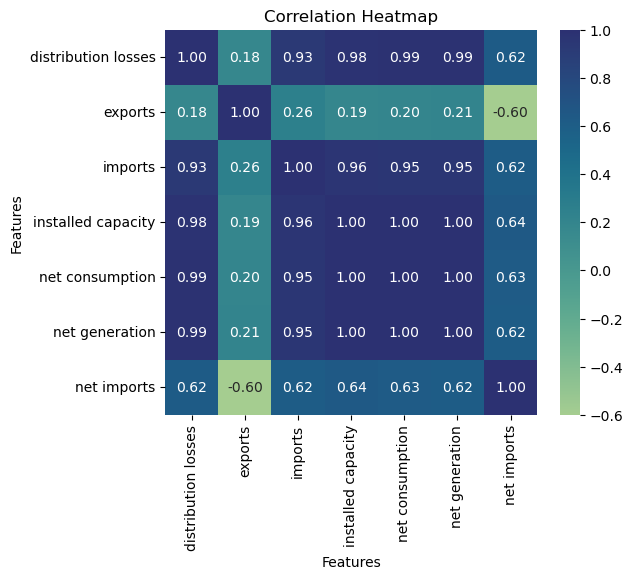

In [24]:
# correlation matrix

plt.figure(figsize = (6, 5), facecolor = 'white')
plt.title('Correlation Heatmap')
sns.heatmap(data = df_electricity_a.corr(numeric_only = True), cmap = 'crest', fmt = '0.2f', linecolor = 'black', annot = True)

plt.show()

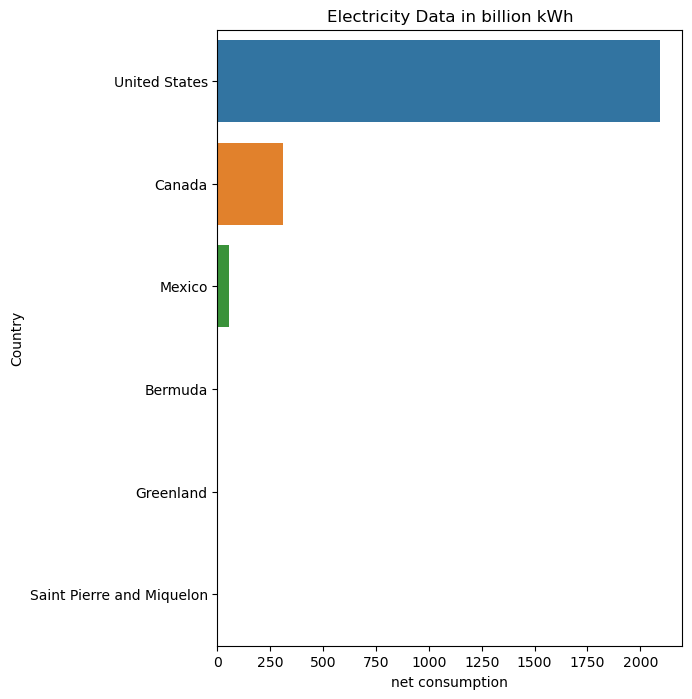

In [27]:
plt.figure(figsize = (6, 8), facecolor = 'white')
plt.title('Electricity Data in billion kWh')
sns.barplot(data = df_electricity_a[df_electricity_a['Year'] == "1980"].sort_values(by = ['net consumption'], ascending = False)[:25], x = 'net consumption', y = "Country")
plt.show()

In [28]:
df_electricity_a[df_electricity_a['Year'] == "2021"].sort_values(by = ['net consumption'], ascending = False)[:25]

Features,Country,Region,Year,distribution losses,exports,imports,installed capacity,net consumption,net generation,net imports
251,United States,North America,2021,224.610380,13.841163,53.166585,1176.728800,3979.279761,4164.564719,39.325422
83,Canada,North America,2021,33.037227,48.140421,10.067376,153.617000,554.744387,625.854659,-38.073045
167,Mexico,North America,2021,38.420159,6.028000,8.447000,94.422000,300.957065,336.958223,2.419000
125,Greenland,North America,2021,0.017000,0.000000,0.000000,0.187189,0.582710,0.599710,0.000000
41,Bermuda,North America,2021,0.041000,0.000000,0.000000,0.171500,0.539310,0.580310,0.000000
209,Saint Pierre and Miquelon,North America,2021,0.001285,0.000000,0.000000,0.026200,0.053199,0.054483,0.000000


In [63]:
import geopandas as gpd
import ipywidgets as widgets

# Load shapefile data for North America
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
north_america = world[world['continent'] == 'North America']

attributes = ['distribution losses', 'exports', 'imports', 'installed capacity', 'net consumption', 'net imports']
dropdown = widgets.Dropdown(options=attributes, description='Select Attribute:', disable=False)

merged_data = north_america.merge(df_electricity_a, how='inner', left_on='name', right_on='Country')

def update_map(attribute):
    plt.figure(figsize=(12, 8))
    merged_data.plot(column=attribute, cmap='OrRd', legend=True, 
                     legend_kwds={'label': attribute, 'orientation': "horizontal"})
    plt.title(f"{attribute} in Billion kWh", fontsize=16)
    plt.axis('off')
    plt.show()

widgets.interactive(update_map, attribute=dropdown)

interactive(children=(Dropdown(description='Select Attribute:', options=('distribution losses', 'exports', 'im…

In [59]:
merged_data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Region,Year,distribution losses,exports,imports,installed capacity,net consumption,net generation,net imports
0,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,North America,1980,32.237,30.480,4.399619,79.186,309.479619,367.797,-26.080381
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,North America,1981,28.074,36.365,3.278011,81.597,319.060011,380.221,-33.086989
2,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,North America,1982,30.009,36.713,7.458290,84.170,319.166290,378.430,-29.254710
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,North America,1983,30.458,38.895,3.641434,86.911,331.646434,397.358,-35.253566
4,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,North America,1984,30.699,40.828,1.252173,93.245,356.708173,426.983,-39.575827


In [43]:
widgets.interactive(update_map, attribute=dropdown)

interactive(children=(Dropdown(description='Select Attribute:', options=(), value=None), Output()), _dom_class…

In [53]:
df_electricity_a[df_electricity_a['Country']=='United States']['Country'] = 'United States of America'

In [55]:
df_electricity_a.loc[df_electricity_a['Country']=='United States', 'Country'] = 'United States of America'

In [56]:
df_electricity_a

Features,Country,Region,Year,distribution losses,exports,imports,installed capacity,net consumption,net generation,net imports
0,Bermuda,North America,1980,0.021770,0.000000,0.000000,0.1180,0.289230,0.311000,0.000000
1,Bermuda,North America,1981,0.022400,0.000000,0.000000,0.1180,0.297600,0.320000,0.000000
2,Bermuda,North America,1982,0.023170,0.000000,0.000000,0.1180,0.307830,0.331000,0.000000
3,Bermuda,North America,1983,0.024150,0.000000,0.000000,0.1370,0.320850,0.345000,0.000000
4,Bermuda,North America,1984,0.025060,0.000000,0.000000,0.1490,0.332940,0.358000,0.000000
...,...,...,...,...,...,...,...,...,...,...
247,United States of America,North America,2017,227.441646,9.370803,65.684917,1100.5174,3888.305645,4059.433178,56.314114
248,United States of America,North America,2018,222.354820,13.804492,58.260602,1114.2869,4032.628267,4210.526978,44.456110
249,United States of America,North America,2019,215.197507,20.008032,59.052461,1122.3229,3989.378249,4165.531327,39.044429
250,United States of America,North America,2020,200.709212,14.134679,61.448863,1143.2656,3897.894198,4051.289226,47.314184
